In [22]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
import random
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]
data = data[:15]

# data = np.array([(0, 0), (1, 2), (2, 4), (3, 1), (7, 3), (2,5), (4,4)]) * 10
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)

if len(data[0])==2:
    is_cost = False
else:
    is_cost = True
print("is_cost",is_cost)
matrix, cost_list =  get_dist_matrix_and_cost(data, cost=is_cost)
matrix



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[2907, 1115, 464], [3433, 183, 932], [2237, 74, 130], [91, 583, 503], [3053, 1867, 496], [2698, 436, 283], [1940, 1520, 735], [1251, 807, 893], [1415, 700, 128], [472, 498, 979], [1537, 1883, 759], [2839, 370, 754], [1083, 1307, 27], [702, 196, 680], [1393, 917, 523]]
15
is_cost True


array([[          inf, 1070.18689956, 1237.97455547, 2865.81227578,
         766.04177432,  710.43789313, 1048.38637916, 1684.39900261,
        1548.64101715, 2511.95421933, 1570.5807843 ,  748.09691885,
        1834.07742476, 2388.84616499, 1526.89226863],
       [1070.18689956,           inf, 1200.95670197, 3365.85264086,
        1726.34179698,  777.3248999 , 2004.15019397, 2269.47130407,
        2083.17378056, 2977.70817912, 2546.53018832,  622.73991361,
        2604.97140099, 2731.03094087, 2168.03044259],
       [1237.97455547, 1200.95670197,           inf, 2205.5378029 ,
        1969.95050699,  586.14418022, 1476.18596389, 1228.61100435,
        1033.22795162, 1815.21376152, 1939.7115765 ,  670.8353002 ,
        1688.78802696, 1539.84057616, 1192.88934944],
       [2865.81227578, 3365.85264086, 2205.5378029 ,           inf,
        3228.32774049, 2611.14112985, 2072.86516686, 1181.42964242,
        1329.15950886,  390.36649446, 1944.45776503, 2756.24255101,
        1228.1042301 ,

In [23]:
def count_cost_diff_cycle(edge, new_n, dist_m):
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)print(distance_matrix[:10][:10])
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    # assert cost_diff>0, f'{cost_diff, - dist_m[start_n][ end_n], dist_m[start_n][ new_n], dist_m[new_n][end_n]}' #
    return cost_diff

def create_regret_matrix(non_visited, cur_tour, dist_m): #cur_tour = edges
    reg_matrix = np.zeros((len(dist_m),len(cur_tour)))
    # reg_matrix.fill(10000000)
    for new_node in non_visited:
        for i,edge in enumerate(cur_tour):
            reg_matrix[new_node][i]=count_cost_diff_cycle(edge, new_node, dist_m)

    return reg_matrix


def return_biggest_regret(matrix):
    min_values_for_rows = np.min(matrix, axis=1)
    # print("min_values_for_rows",min_values_for_rows)
    rescue_node = np.argmax(min_values_for_rows, axis=0) #najlepiej ratować 4 index
    # print("City with bigest regret",rescue_node)
    rescueing_node = np.argmin(matrix[rescue_node])# def return_max_from_min_rows_regret(matrix):
    # print("Rescueing edge index to modify: ",rescueing_node)
    return rescue_node, rescueing_node

def add_to_cycle(edge, new_n, dist_m,edges):
    #
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    edges.remove(edge)
    edges.append([start_n, new_n])
    edges.append([new_n, end_n])
    return edges, cost_diff



In [24]:
from copy import deepcopy
a = np.array([1,2,3,4])
b = np.array([0,0,5,5])
np.minimum(a,b)



array([0, 0, 3, 4])

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [(2, 1), (1, 2)]
0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

[0.0, -1, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[(1, 2), [2, 0], [0, 1]]
True


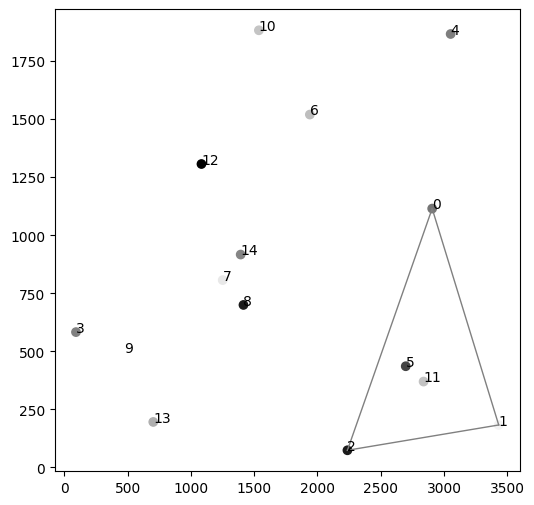

103.90486026990231 

0.0 

652.6551277314702 

103.90486026990231 

103.90486026990231 

103.90486026990231 

103.90486026990231 

103.90486026990231 

0.0 

103.90486026990231 

103.90486026990231 

103.90486026990231 

[-1, -1, -1, 103.90486026990231, 0.0, 652.6551277314702, 103.90486026990231, 103.90486026990231, 103.90486026990231, 103.90486026990231, 103.90486026990231, 0.0, 103.90486026990231, 103.90486026990231, 103.90486026990231]
[(1, 2), [0, 1], [2, 5], [5, 0]]
True


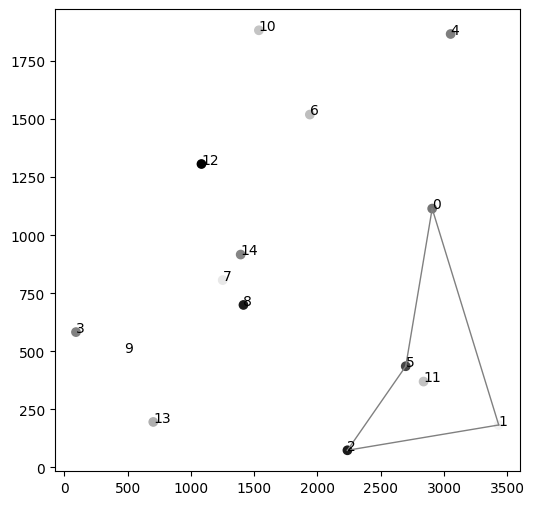

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

0.0 

[-1, -1, -1, 0.0, 0.0, -1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[(1, 2), [0, 1], [5, 0], [2, 3], [3, 5]]
True


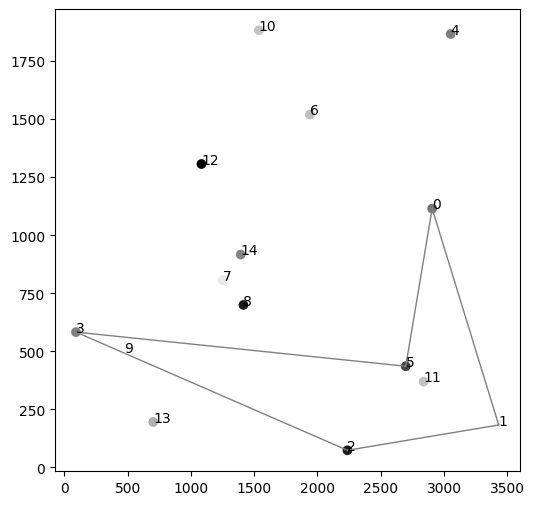

0.0 

128.9515130968689 

286.2401738027081 

490.1248862317884 

46.68475676741235 

207.67061732119942 

0.0 

128.9515130968689 

6.046176301373748 

252.5352533864709 

[-1, -1, -1, -1, 0.0, -1, 128.9515130968689, 286.2401738027081, 490.1248862317884, 46.68475676741235, 207.67061732119942, 0.0, 128.9515130968689, 6.046176301373748, 252.5352533864709]
[(1, 2), [0, 1], [5, 0], [2, 3], [3, 8], [8, 5]]
True


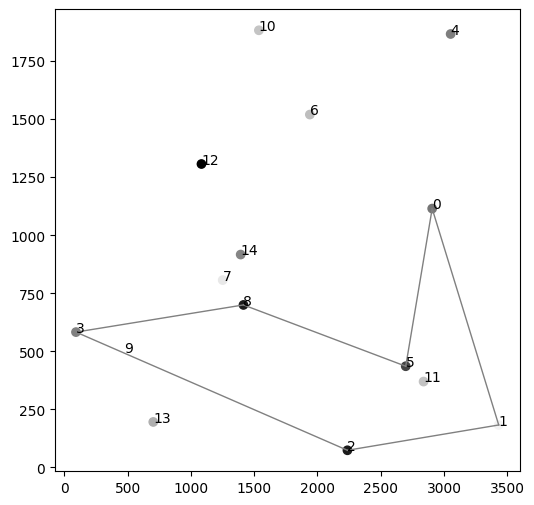

0.0 

0.0 

0.0 

55.9528614887879 

209.6843264061414 

0.0 

0.0 

55.9528614887879 

0.0 

[-1, -1, -1, -1, 0.0, -1, 0.0, 0.0, -1, 55.9528614887879, 209.6843264061414, 0.0, 0.0, 55.9528614887879, 0.0]
[(1, 2), [0, 1], [5, 0], [3, 8], [8, 5], [2, 10], [10, 3]]
True


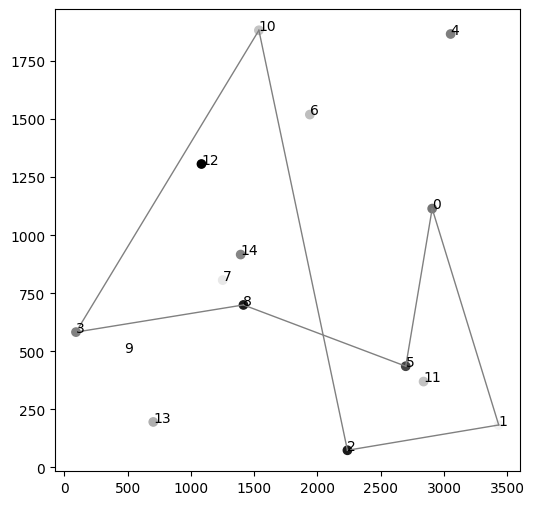

0.0 

3.258855764655209 

95.99789132277647 

21.38384959736902 

0.0 

0.0 

95.99789132277647 

300.98801717871106 

[-1, -1, -1, -1, 0.0, -1, 3.258855764655209, 95.99789132277647, -1, 21.38384959736902, -1, 0.0, 0.0, 95.99789132277647, 300.98801717871106]
[(1, 2), [0, 1], [5, 0], [3, 8], [8, 5], [10, 3], [2, 14], [14, 10]]
True


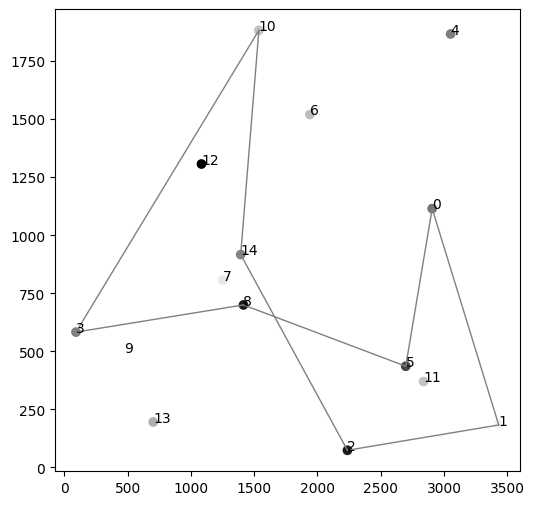

0.0 

0.0 

95.99789132277647 

21.38384959736902 

0.0 

0.0 

95.99789132277647 

[-1, -1, -1, -1, 0.0, -1, 0.0, 95.99789132277647, -1, 21.38384959736902, -1, 0.0, 0.0, 95.99789132277647, -1]
[(1, 2), [0, 1], [5, 0], [8, 5], [10, 3], [2, 14], [14, 10], [3, 7], [7, 8]]
True


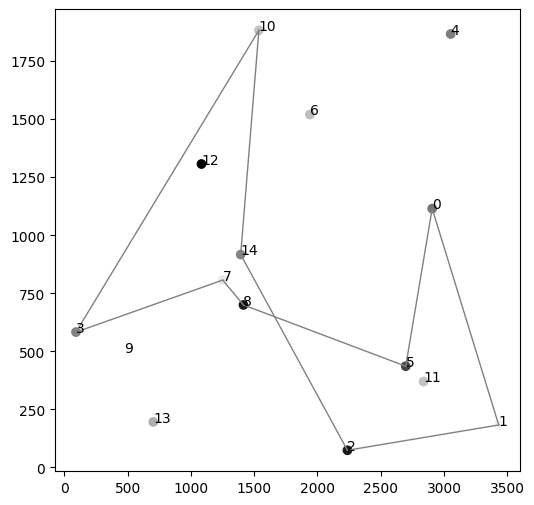

In [35]:
cur_tour = [(2,1),(1,2)]
non_visited = list(x for x in range(NR_NODES))
non_visited.remove(cur_tour[0][0])
non_visited.remove(cur_tour[0][1])
print(non_visited, cur_tour)
total_cost = 0
# plotMap(data, edges=cur_tour, colors = False, cost = False)
for i in range(HALF_NODES):
    start_dist_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
    start_dist_for_nodes = np.min(start_dist_matrix, axis = 1)

    
    max_regrets = [-1 for i in range(NR_NODES)]
    for new_node in non_visited:
        #zakładamy że bierzemy najlepszy edge dla danego node
        edge = cur_tour[np.argmin(start_dist_matrix[new_node], axis=0)]

        #if we add new_node in place of edge
        sim_non_visited = deepcopy(non_visited)
        sim_cur_tour = deepcopy(cur_tour)
        sim_cur_tour, _ = add_to_cycle(edge, new_node, matrix, sim_cur_tour)
        sim_non_visited.remove(new_node)
        # sim_cur_tour = [(new_node, edge[0]), (edge[1], new_node)]
        sim_regret_matrix = create_regret_matrix(sim_non_visited, sim_cur_tour , matrix) #[(new_node, edge[0]), (edge[1], new_node)]
        distances_after_inserting = np.min(sim_regret_matrix, axis = 1) #min distance to every node after we insert node in particular place,
        # print("new_node, edge, distances_after_inserting")
        # print(new_node, edge, distances_after_inserting)
        # for i, (x,y,z) in enumerate(zip(start_dist_for_nodes,distances_after_inserting, regret)):
        #     print(i, np.round((x,y,z)))
        regret = distances_after_inserting - start_dist_for_nodes

        # print(pd.DataFrame(zip(start_dist_for_nodes,distances_after_inserting, regret)))
        max_regrets[new_node] = np.max(regret) #if we dont add this node some other node will be further by max_regret
    print(max_regrets)
    added_node = np.argmax(max_regrets)
    edge = cur_tour[np.argmin(start_dist_matrix[added_node], axis=0)]

    cur_tour.append([edge[0], added_node])
    cur_tour.append([added_node, edge[1]])
    cur_tour.remove(edge)
    non_visited.remove(added_node)
    # print("---- ",rescued_node, cur_tour, non_visited)
    print(cur_tour)
    plotMap(data, edges=cur_tour, colors = False, cost=is_cost)
        # print("FINAL", i, total_cost)